In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df1 = pd.read_csv('train_dataset.csv')
df1

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,3,2,3,3,2,0,2,0,0,...,0,0,0,3,2,1,0,2,27,3
1,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,52,5
2,2,2,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,30,4
3,2,2,1,0,1,0,0,0,0,0,...,0,0,0,0,1,3,0,2,62,4
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,3,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1,1,0,1,0,0,3,0,1,0,...,0,0,0,0,0,0,1,1,9,6
530,2,1,1,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,12,6
531,2,2,0,0,0,0,2,0,2,1,...,0,0,0,0,0,1,2,2,7,6
532,2,1,2,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,11,6


In [2]:
X_train_sm = df1.drop('class', axis=1)
y_train_sm = df1['class']

In [3]:
import pandas as pd
df2 = pd.read_csv('test_dataset.csv')
df2

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36,2
1,3,1,2,3,2,2,0,2,0,0,...,0,0,0,2,0,0,0,3,16,3
2,2,1,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,35,4
3,1,3,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,3,60,1
4,3,2,1,0,2,0,0,0,0,0,...,0,0,0,0,0,3,0,2,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,2,2,2,1,2,0,2,0,0,...,0,0,0,2,0,3,0,2,36,3
70,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,30,2
71,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,27,4
72,2,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,2,35,2


In [4]:
X_test = df2.drop('class',axis=1)
y_test = df2['class']

In [5]:
# Train & test RandomForest with your parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Your provided best params (I add random_state and n_jobs for reproducibility / speed)
rf_params = {
    'bootstrap': True,
    'class_weight': None,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 400,
    'random_state': 42,
    'n_jobs': -1
}

clf = RandomForestClassifier(**rf_params)

# Fit
clf.fit(X_train_sm, y_train_sm)

# Predict
y_pred = clf.predict(X_test)


# Metrics
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9595

Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74


Confusion matrix:
 [[23  0  0  0  0  0]
 [ 0 10  0  2  0  0]
 [ 0  0 15  0  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  4]]



=== All Feature Importances (sorted) ===
                                Feature  Importance
0             fibrosis_papillary_dermis    0.100143
1                  follicular_horn_plug    0.076436
2                     polygonal_papules    0.072590
3                 focal_hypergranulosis    0.070794
4                  clubbing_rete_ridges    0.058155
5     thinning_suprapapillary_epidermis    0.056792
6                elongation_rete_ridges    0.055646
7                    follicular_papules    0.054910
8                            spongiosis    0.052962
9                    koebner_phenomenon    0.052850
10                                  age    0.052847
11             oral_mucosal_involvement    0.040121
12                              itching    0.039666
13           knee_and_elbow_involvement    0.034219
14                       PNL_infiltrate    0.031559
15                           exocytosis    0.023128
16                              scaling    0.022580
17                    

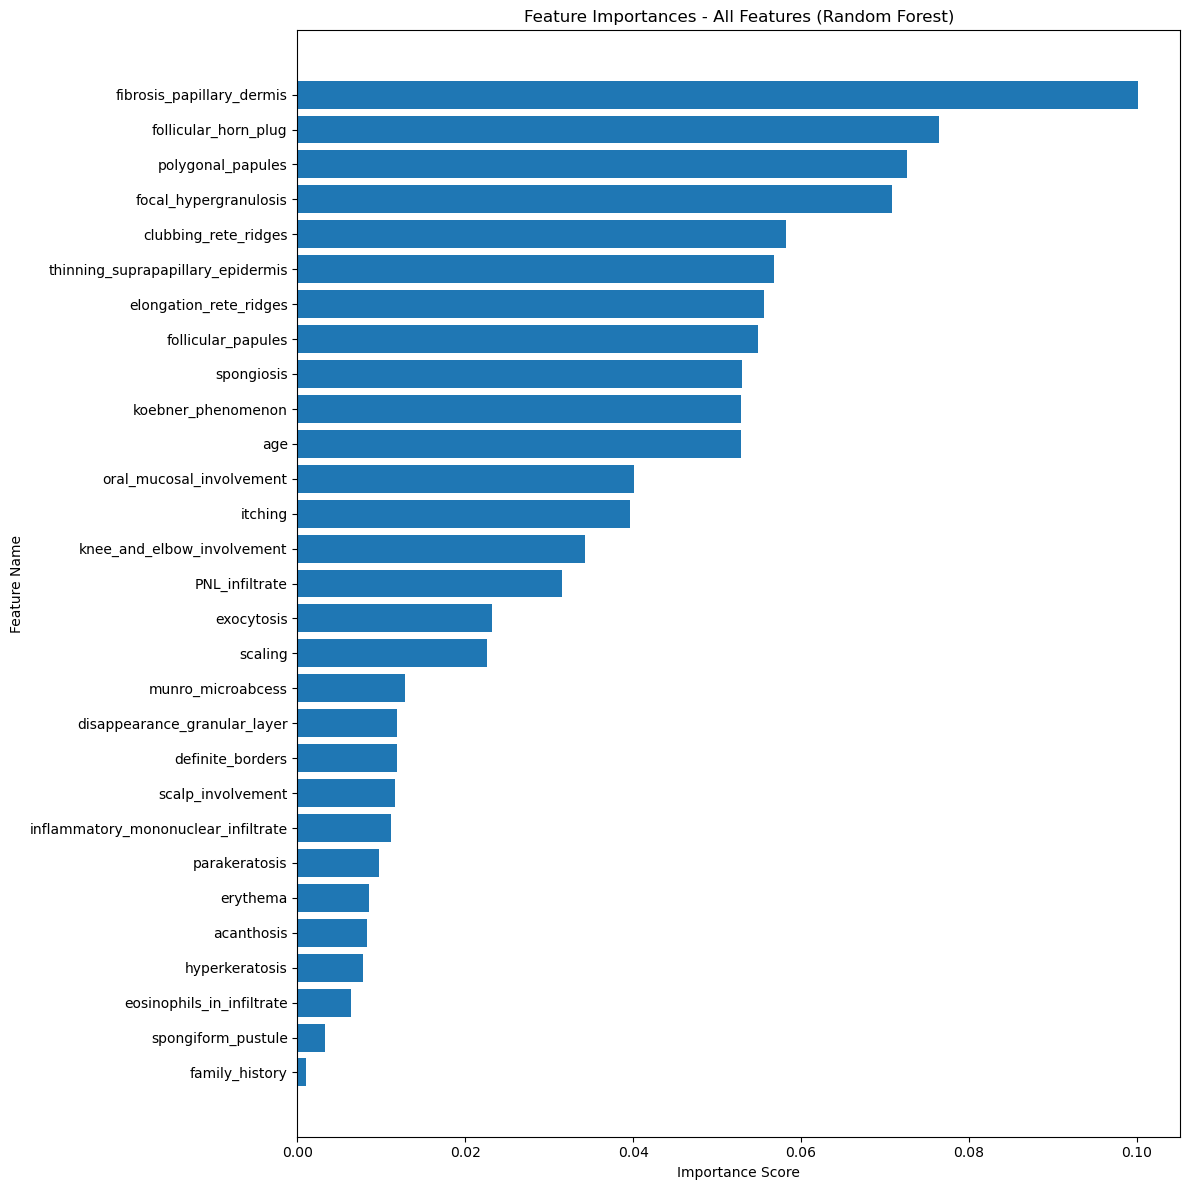

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all importances
importances = clf.feature_importances_
feature_names = X_train_sm.columns

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort all features
fi_df = fi_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print all features
print("\n=== All Feature Importances (sorted) ===")
print(fi_df)

# Plot all features
plt.figure(figsize=(12, 12))
plt.barh(fi_df['Feature'][::-1], fi_df['Importance'][::-1])
plt.title("Feature Importances - All Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


In [7]:
import pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(clf, f)